In [46]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
ds_salaries_df = pd.read_csv('../Project 1/data_science_salaries.csv')

# Display the first few rows of the dataframe
ds_salaries_df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [47]:
# Display summary statistics
ds_salaries_df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


In [48]:
# Unique values in 'employment_type'
ds_salaries_df['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [49]:
# Unique values in 'company_size'
ds_salaries_df['company_size'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [50]:
# Unique values in 'experience_level'
ds_salaries_df['experience_level'].unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

In [51]:
# Value counts of 'employment_type'
ds_salaries_df['employment_type'].value_counts()

employment_type
Full-time    6552
Contract       19
Part-time      16
Freelance      12
Name: count, dtype: int64

In [52]:
# Value counts of 'company_size'
ds_salaries_df['company_size'].value_counts()

company_size
Medium    5860
Large      569
Small      170
Name: count, dtype: int64

In [53]:
# Value counts of 'experience_level'
ds_salaries_df['experience_level'].value_counts()

experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64

In [54]:
# Average salary by company size
ds_avg_salary_by_size = ds_salaries_df.groupby('company_size')['salary_in_usd'].mean().reset_index()
ds_avg_salary_by_size

,company_size,salary_in_usd
0,Large,120638.404218
1,Medium,149659.386689
2,Small,87687.458824


In [55]:
# Distribution of job titles by company size
ds_job_title_dist = ds_salaries_df.groupby(['company_size', 'job_title']).size().reset_index(name='counts')
ds_job_title_dist.head()

,company_size,job_title,counts
0,Large,AI Architect,2
1,Large,AI Developer,2
2,Large,AI Engineer,3
3,Large,AI Product Manager,1
4,Large,AI Programmer,2


In [56]:
# Experience level distribution by company size
ds_experience_level_dist = ds_salaries_df.groupby(['company_size', 'experience_level']).size().reset_index(name='counts')
ds_experience_level_dist.head()

,company_size,experience_level,counts
0,Large,Entry-level,115
1,Large,Executive-level,20
2,Large,Mid-level,181
3,Large,Senior-level,253
4,Medium,Entry-level,401


In [57]:
# Calculate total counts per company size
total_counts_per_size = ds_experience_level_dist.groupby('company_size')['counts'].sum().reset_index()
total_counts_per_size.columns = ['company_size', 'total_counts']

In [58]:
# Merge total counts with the original data
ds_experience_level_dist = pd.merge(ds_experience_level_dist, total_counts_per_size, on='company_size')

In [59]:
# Calculate the percentage
ds_experience_level_dist['percentage'] = (ds_experience_level_dist['counts'] / ds_experience_level_dist['total_counts']) * 100

In [60]:
# Pivot the data for plotting
df_exp_dist_percentage = ds_experience_level_dist.pivot(index='company_size', columns='experience_level', values='percentage')
df_exp_dist_percentage

experience_level,Entry-level,Executive-level,Mid-level,Senior-level
company_size,,,,
Large,20.210896,3.514938,31.810193,44.463972
Medium,6.843003,3.856655,24.436860,64.863481
Small,28.823529,4.705882,36.470588,30.000000


In [61]:
# Average salary by company size and experience level
ds_avg_salary_by_exp_and_size = ds_salaries_df.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().reset_index()
ds_avg_salary_by_exp_and_size

,company_size,experience_level,salary_in_usd
0,Large,Entry-level,74603.330435
1,Large,Executive-level,187993.900000
2,Large,Mid-level,100625.171271
3,Large,Senior-level,150556.660079
4,Medium,Entry-level,89223.052369
5,Medium,Executive-level,190563.402655
6,Medium,Mid-level,123303.988827
7,Medium,Senior-level,163532.470666
8,Small,Entry-level,68485.938776
9,Small,Executive-level,169172.375000


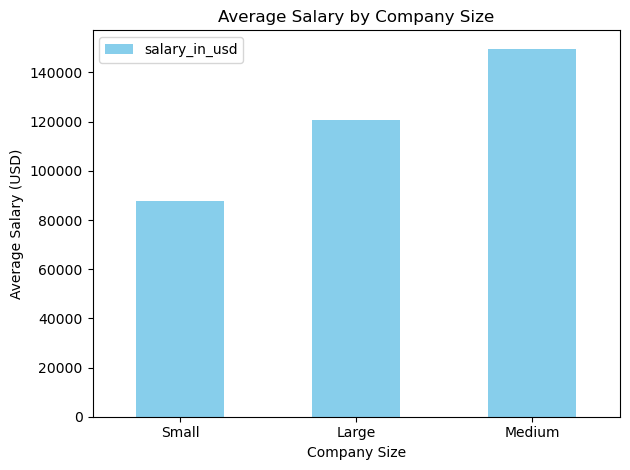

In [62]:
# 1. Average Salary by Company Size
ds_avg_salary_by_size.sort_values(by='salary_in_usd').plot(kind='bar', x='company_size', y='salary_in_usd', color='skyblue', title='Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

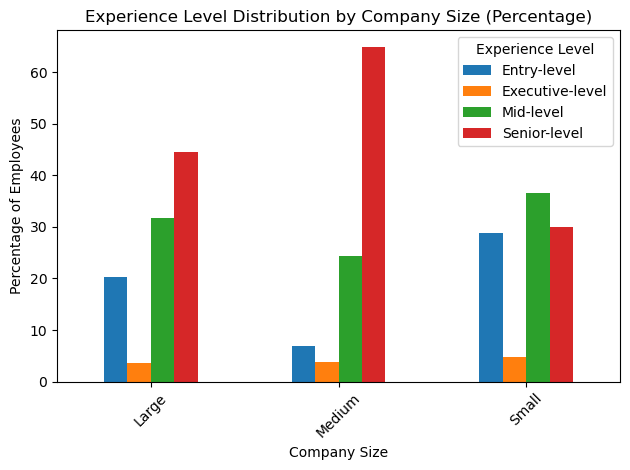

In [63]:
# 2. Experience Level Distribution by Company Size (Percentage)
plt.figure(figsize=(12, 8))
df_exp_dist_percentage.plot(kind='bar', stacked=False)
plt.title('Experience Level Distribution by Company Size (Percentage)')
plt.xlabel('Company Size')
plt.ylabel('Percentage of Employees')
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

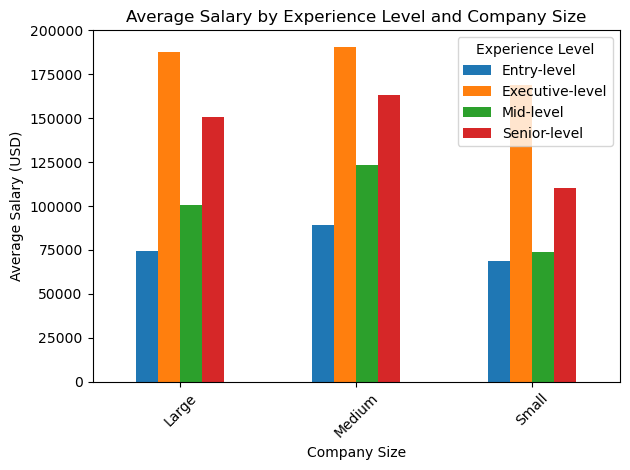

In [71]:
# 3. Average Salary by Experience Level and Company Size
df_avg_salary_exp_size = ds_avg_salary_by_exp_and_size.pivot(index='company_size', columns='experience_level', values='salary_in_usd')
plt.figure(figsize=(12, 8))
df_avg_salary_exp_size.plot(kind='bar', stacked=False)
plt.title('Average Salary by Experience Level and Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()